In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data\artist_song\artist_song.csv
data\artist_song\artist_song.json
data\billboard\billboard_top_100.csv
data\billboard\billboard_top_100_2020.csv
data\input\songs-2.csv
data\input\top100.json
data\input\top100_old.json
data\lyrics\artist_song_lyrics.csv
data\lyrics\filtered_lyrics.csv
data\lyrics\filtered_lyrics.xlsx
data\lyrics\long_lyrics.csv
data\lyrics\long_lyrics.xlsx
data\lyrics\lyrics.xlsx
data\lyrics\missing_lyrics.csv
data\lyrics\missing_lyrics.xlsx
data\lyrics\short_lyrics.csv


In [4]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 30)
lyrics = pd.read_csv('data/lyrics/filtered_lyrics.csv', index_col=0)
lyrics.sort_values(by='id', ascending=True, inplace=True)
lyrics.rename(columns={'id' : 'billboard_id'}, inplace=True)
lyrics['lyrics_id'] = lyrics.index
lyrics=lyrics[['billboard_id','lyrics_id', 'artist', 'first_artist', 'song', 'weeks_on_chart', 'peak_rank',
       'lyrics', 'length', 'word_count', 'language', 'language_score']]
lyrics.reset_index(inplace=True,drop=True)
lyrics.head()

,billboard_id,lyrics_id,artist,first_artist,song,weeks_on_chart,peak_rank,lyrics,length,word_count,language,language_score
0,0,91,Ariana Grande,Ariana Grande,"Thank U, Next",28.0,1.0,Thought I'd end up with Se...,2427.0,459.0,en,0.999996
1,1,481,Halsey,Halsey,Without Me,52.0,1.0,Found you when your heart ...,2097.0,435.0,en,0.999997
2,2,842,Mariah Carey,Mariah Carey,All I Want For Christmas I...,43.0,1.0,I don't want a lot for Chr...,1947.0,389.0,en,0.999999
3,3,1216,Travis Scott,Travis Scott,Sicko Mode,52.0,1.0,"Astro, yeah Sun is down, f...",3973.0,772.0,en,0.999997
4,4,1019,Post Malone & Swae Lee,Post Malone,Sunflower (Spider-Man: Int...,53.0,1.0,"Ayy, ayy, ayy, ayy (Ooh) O...",1564.0,306.0,en,0.999997


In [5]:
lyrics_lat = lyrics[['billboard_id','lyrics_id', 'artist', 'first_artist', 'song', 'weeks_on_chart', 'peak_rank',
       'lyrics']].head()

print(lyrics_lat.to_latex(index=False))

\begin{tabular}{rrlllrrl}
\toprule
 billboard\_id &  lyrics\_id &                 artist &  first\_artist &                           song &  weeks\_on\_chart &  peak\_rank &                         lyrics \\
\midrule
            0 &         91 &          Ariana Grande & Ariana Grande &                  Thank U, Next &            28.0 &        1.0 & Thought I'd end up with Sea... \\
            1 &        481 &                 Halsey &        Halsey &                     Without Me &            52.0 &        1.0 & Found you when your heart w... \\
            2 &        842 &           Mariah Carey &  Mariah Carey & All I Want For Christmas Is... &            43.0 &        1.0 & I don't want a lot for Chri... \\
            3 &       1216 &           Travis Scott &  Travis Scott &                     Sicko Mode &            52.0 &        1.0 & Astro, yeah Sun is down, fr... \\
            4 &       1019 & Post Malone \& Swae Lee &   Post Malone & Sunflower (Spider-Man: Into... &       

In [6]:
def remove_last_number(string):
    first, *middle, last = string.split()
    last = ''.join([i for i in last if not i.isdigit()])
    middle.insert(0, first)
    middle.append(last)
    string = ' '.join(middle)
    return string


In [7]:
lyrics['lyrics'] = lyrics['lyrics'].apply(lambda string: remove_last_number(string))

In [8]:
top100 = pd.read_csv('data/billboard/billboard_top_100.csv', index_col=0)
top100.rename(columns={'id' : 'billboard_id'}, inplace=True)
top100.tail()

,billboard_id,song,artist,peak_rank,rank_last_week,weeks_on_chart,rank,date
10495,10495,Hole In The Bottle,Kelsea Ballerini,72,0,10,96,2021-01-02
10496,10496,"No Body, No Crime",Taylor Swift Featuring HAIM,34,34,2,97,2021-01-02
10497,10497,Moonwalking In Calabasas,DDG,98,0,1,98,2021-01-02
10498,10498,Took Her To The O,King Von,47,0,6,99,2021-01-02
10499,10499,Put Your Records On,Ritt Momney,79,0,10,100,2021-01-02


In [9]:
merge_cols = lyrics.columns.difference(top100.columns)
merge_cols = merge_cols.tolist()
merge_cols.append('billboard_id')
merge_cols

['first_artist',
 'language',
 'language_score',
 'length',
 'lyrics',
 'lyrics_id',
 'word_count',
 'billboard_id']

In [10]:
all = top100.merge(lyrics[merge_cols],how='left', left_on='billboard_id', right_on='billboard_id', copy=False)

In [11]:
all.columns

Index(['billboard_id', 'song', 'artist', 'peak_rank', 'rank_last_week',
       'weeks_on_chart', 'rank', 'date', 'first_artist', 'language',
       'language_score', 'length', 'lyrics', 'lyrics_id', 'word_count'],
      dtype='object')

In [12]:
all = all[['billboard_id',
           'lyrics_id',
           'date',
           'song',
           'artist',
           'first_artist',
           'lyrics',
           'language',
           'language_score',
           'length',
           'word_count',
           'rank',
           'peak_rank',
           'rank_last_week',
           'weeks_on_chart']]

In [13]:
all = all.sort_values(by=['song', 'artist', 'lyrics_id']).interpolate(method='pad')
all.sort_values(by='billboard_id', inplace=True)
all.head()

,billboard_id,lyrics_id,date,song,artist,first_artist,lyrics,language,language_score,length,word_count,rank,peak_rank,rank_last_week,weeks_on_chart
0,0,91.0,2019-01-05,"Thank U, Next",Ariana Grande,Ariana Grande,Thought I'd end up with Se...,en,0.999996,2427.0,459.0,1,1,1,8
1,1,481.0,2019-01-05,Without Me,Halsey,Halsey,Found you when your heart ...,en,0.999997,2097.0,435.0,2,2,2,12
2,2,842.0,2019-01-05,All I Want For Christmas I...,Mariah Carey,Mariah Carey,I don't want a lot for Chr...,en,0.999999,1947.0,389.0,3,3,7,30
3,3,1216.0,2019-01-05,Sicko Mode,Travis Scott,Travis Scott,"Astro, yeah Sun is down, f...",en,0.999997,3973.0,772.0,4,1,3,21
4,4,1019.0,2019-01-05,Sunflower (Spider-Man: Int...,Post Malone & Swae Lee,Post Malone,"Ayy, ayy, ayy, ayy (Ooh) O...",en,0.999997,1564.0,306.0,5,4,4,10


In [14]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   billboard_id    10500 non-null  int64  
 1   lyrics_id       10500 non-null  float64
 2   date            10500 non-null  object 
 3   song            10500 non-null  object 
 4   artist          10500 non-null  object 
 5   first_artist    10500 non-null  object 
 6   lyrics          10500 non-null  object 
 7   language        10500 non-null  object 
 8   language_score  10500 non-null  float64
 9   length          10500 non-null  float64
 10  word_count      10500 non-null  float64
 11  rank            10500 non-null  int64  
 12  peak_rank       10500 non-null  int64  
 13  rank_last_week  10500 non-null  int64  
 14  weeks_on_chart  10500 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.3+ MB


In [15]:
all['lyrics_id'] = pd.to_numeric(all['lyrics_id'], downcast='integer')
all['length'] = pd.to_numeric(all['length'], downcast='integer')
all['word_count'] = pd.to_numeric(all['word_count'], downcast='integer')
all['date'] = pd.to_datetime(all['date'], format='%Y-%m-%d')
all.dtypes

billboard_id               int64
lyrics_id                  int16
date              datetime64[ns]
song                      object
artist                    object
                       ...      
word_count                 int16
rank                       int64
peak_rank                  int64
rank_last_week             int64
weeks_on_chart             int64
Length: 15, dtype: object

In [16]:
all.head()

,billboard_id,lyrics_id,date,song,artist,first_artist,lyrics,language,language_score,length,word_count,rank,peak_rank,rank_last_week,weeks_on_chart
0,0,91,2019-01-05,"Thank U, Next",Ariana Grande,Ariana Grande,Thought I'd end up with Se...,en,0.999996,2427,459,1,1,1,8
1,1,481,2019-01-05,Without Me,Halsey,Halsey,Found you when your heart ...,en,0.999997,2097,435,2,2,2,12
2,2,842,2019-01-05,All I Want For Christmas I...,Mariah Carey,Mariah Carey,I don't want a lot for Chr...,en,0.999999,1947,389,3,3,7,30
3,3,1216,2019-01-05,Sicko Mode,Travis Scott,Travis Scott,"Astro, yeah Sun is down, f...",en,0.999997,3973,772,4,1,3,21
4,4,1019,2019-01-05,Sunflower (Spider-Man: Int...,Post Malone & Swae Lee,Post Malone,"Ayy, ayy, ayy, ayy (Ooh) O...",en,0.999997,1564,306,5,4,4,10


In [17]:
print(all['date'].iloc[0].year)
print(all['date'].iloc[0].month)
print(all['date'].iloc[0].day)

2019
1
5


In [18]:
pd.set_option('display.max_seq_items', 100)
pd.set_option('display.max_colwidth', 334)
blind = all[['artist', 'song', 'lyrics']].loc[all['song'] == 'Blinding Lights'].head(1)

blind

,artist,song,lyrics
4910,The Weeknd,Blinding Lights,"Yeah I've been tryna call I've been on my own for long enough Maybe you can show me how to love, maybe I'm going through withdrawals You don't even have to do too much You can turn me on with just a touch, baby I look around and Sin City's cold and empty (Oh) No one's around to judge me (Oh) I can't see clearly when you're gone ..."


In [19]:
print(blind.to_latex(index=True))

\begin{tabular}{llll}
\toprule
{} &      artist &             song &                                                                                                                                                                                                                                                                                                                                         lyrics \\
\midrule
4910 &  The Weeknd &  Blinding Lights &  Yeah I've been tryna call I've been on my own for long enough Maybe you can show me how to love, maybe I'm going through withdrawals You don't even have to do too much You can turn me on with just a touch, baby I look around and Sin City's cold and empty (Oh) No one's around to judge me (Oh) I can't see clearly when you're gone ... \\
\bottomrule
\end{tabular}



In [20]:
all.loc[all['date'] == '2020-07-25'].head(5)
pd.set_option('display.max_colwidth', 200)
all_trans = all.head().transpose()
all_trans

,0,1,2,3,4
billboard_id,0,1,2,3,4
lyrics_id,91,481,842,1216,1019
date,2019-01-05 00:00:00,2019-01-05 00:00:00,2019-01-05 00:00:00,2019-01-05 00:00:00,2019-01-05 00:00:00
song,"Thank U, Next",Without Me,All I Want For Christmas Is You,Sicko Mode,Sunflower (Spider-Man: Into The Spider-Verse)
artist,Ariana Grande,Halsey,Mariah Carey,Travis Scott,Post Malone & Swae Lee
...,...,...,...,...,...
word_count,459,435,389,772,306
rank,1,2,3,4,5
peak_rank,1,2,3,1,4
rank_last_week,1,2,7,3,4


In [21]:
print(all_trans.to_latex())

\begin{tabular}{llllll}
\toprule
{} &                                                                                                                                                                                                        0 &                                                                                                                                                                                                        1 &                                                                                                                                                                                                        2 &                                                                                                                                                                                                        3 &                                                                                                                                                       

In [22]:
billboard = all[['billboard_id',
           'date',
           'song',
           'artist',
           'rank',
           'peak_rank',
           'rank_last_week',
           'weeks_on_chart']]
bill_desc = billboard.describe()
bill_desc

,billboard_id,rank,peak_rank,rank_last_week,weeks_on_chart
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,5249.500000,50.500000,36.162857,39.344667,12.168190
std,3031.233247,28.867445,28.389212,30.358172,10.803217
min,0.000000,1.000000,1.000000,0.000000,1.000000
25%,2624.750000,25.750000,10.000000,11.000000,4.000000
50%,5249.500000,50.500000,32.000000,36.000000,9.000000
75%,7874.250000,75.250000,59.000000,65.000000,17.000000
max,10499.000000,100.000000,100.000000,100.000000,61.000000


In [23]:
print(bill_desc.to_latex(float_format="%.2f", bold_rows=True, escape=True))

\begin{tabular}{lrrrrr}
\toprule
{} &  billboard\_id &     rank &  peak\_rank &  rank\_last\_week &  weeks\_on\_chart \\
\midrule
\textbf{count} &      10500.00 & 10500.00 &   10500.00 &        10500.00 &        10500.00 \\
\textbf{mean } &       5249.50 &    50.50 &      36.16 &           39.34 &           12.17 \\
\textbf{std  } &       3031.23 &    28.87 &      28.39 &           30.36 &           10.80 \\
\textbf{min  } &          0.00 &     1.00 &       1.00 &            0.00 &            1.00 \\
\textbf{25\%  } &       2624.75 &    25.75 &      10.00 &           11.00 &            4.00 \\
\textbf{50\%  } &       5249.50 &    50.50 &      32.00 &           36.00 &            9.00 \\
\textbf{75\%  } &       7874.25 &    75.25 &      59.00 &           65.00 &           17.00 \\
\textbf{max  } &      10499.00 &   100.00 &     100.00 &          100.00 &           61.00 \\
\bottomrule
\end{tabular}



In [24]:
circles = billboard.loc[(billboard['song'] == 'Circles') & (billboard['artist'] == 'Post Malone')]
circles

,billboard_id,date,song,artist,rank,peak_rank,rank_last_week,weeks_on_chart
3606,3606,2019-09-14,Circles,Post Malone,7,7,0,1
3703,3703,2019-09-21,Circles,Post Malone,4,4,7,2
3808,3808,2019-09-28,Circles,Post Malone,9,4,4,3
3907,3907,2019-10-05,Circles,Post Malone,8,4,9,4
4006,4006,2019-10-12,Circles,Post Malone,7,4,8,5
...,...,...,...,...,...,...,...,...
9216,9216,2020-10-10,Circles,Post Malone,17,1,17,57
9321,9321,2020-10-17,Circles,Post Malone,22,1,17,58
9418,9418,2020-10-24,Circles,Post Malone,19,1,22,59
9518,9518,2020-10-31,Circles,Post Malone,19,1,19,60


In [25]:
average_rank = pd.pivot_table(billboard, index=['date'],
                                values=['rank'],
                                aggfunc={'rank' : 'mean'})
average_rank

,rank
date,
2019-01-05,50.5
2019-01-12,50.5
2019-01-19,50.5
2019-01-26,50.5
2019-02-02,50.5
...,...
2020-12-05,50.5
2020-12-12,50.5
2020-12-19,50.5


<function matplotlib.pyplot.show(close=None, block=None)>

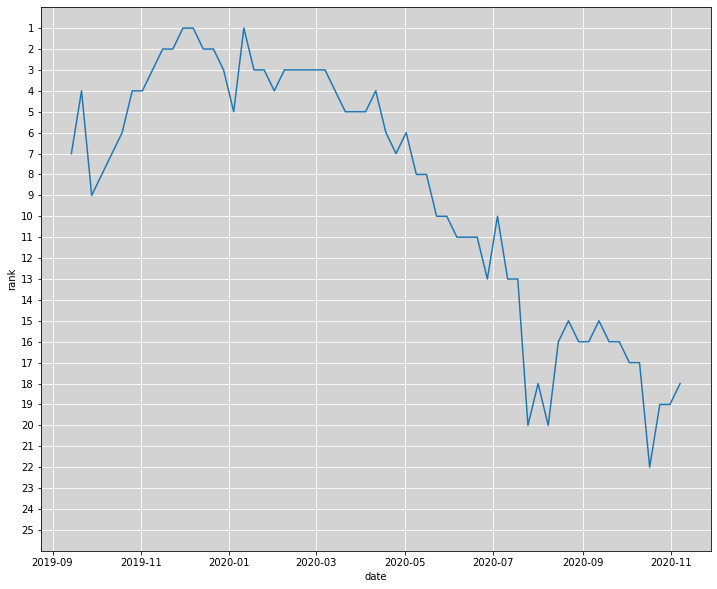

In [26]:
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'white'})
sns.set_style({'axes.facecolor': 'lightgrey',
 'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True})
fig,ax = plt.subplots(figsize=(12,10))
ax.set(ylim=(26, 0), yticks=np.arange(1,26,1))
sns.lineplot(data=circles, x='date', y='rank', ax=ax)
plt.show

In [27]:
missing_lyrics = pd.read_excel('data\lyrics\missing_lyrics.xlsx', index_col=0)
missing_lyrics['lyrics_id'] = missing_lyrics.index
missing_lyrics.rename(columns={'id' : 'billboard_id'}, inplace=True)
missing_lyrics.columns

Index(['billboard_id', 'artist', 'first_artist', 'song', 'weeks_on_chart',
       'peak_rank', 'lyrics', 'length', 'word_count', 'language',
       'language_score', 'link', 'lyrics_id'],
      dtype='object')

In [28]:
pd.set_option('display.max_colwidth', 150)
missing_lyrics_example = missing_lyrics[['billboard_id', 'lyrics_id', 'artist', 'song', 'lyrics']].loc[[353, 506, 97]]
missing_lyrics_example.reset_index(drop=True, inplace=True)
missing_lyrics_example

,billboard_id,lyrics_id,artist,song,lyrics
0,8601,353,Drake Featuring Lil Durk,Laugh Now Cry Later,!Error!
1,8299,506,J. Cole,the.climb.back,!NoSong!
2,9707,97,Ariana Grande Feat. Doja Cat & Megan Thee Stallion,34+35,34+35 - Ariana Grande Never Change (feat. Future) - Trippie Redd Kids Again - Sam Smith Fever - Dua Lipa off the table (with The Weeknd) - Ariana ...


In [29]:
print(missing_lyrics_example.to_latex(index=False))

\begin{tabular}{rrlll}
\toprule
 billboard\_id &  lyrics\_id &                                             artist &                song &                                                                                                                                                 lyrics \\
\midrule
         8601 &        353 &                           Drake Featuring Lil Durk & Laugh Now Cry Later &                                                                                                                                                !Error! \\
         8299 &        506 &                                            J. Cole &      the.climb.back &                                                                                                                                               !NoSong! \\
         9707 &         97 & Ariana Grande Feat. Doja Cat \& Megan Thee Stallion &               34+35 & 34+35 - Ariana Grande Never Change (feat. Future) - Trippie Redd Kids Again - 

In [30]:
print(all.head().to_latex(index=False))

\begin{tabular}{rrllllllrrrrrrr}
\toprule
 billboard\_id &  lyrics\_id &       date &                                          song &                 artist &  first\_artist &                                                                                                                                                 lyrics & language &  language\_score &  length &  word\_count &  rank &  peak\_rank &  rank\_last\_week &  weeks\_on\_chart \\
\midrule
            0 &         91 & 2019-01-05 &                                 Thank U, Next &          Ariana Grande & Ariana Grande & Thought I'd end up with Sean But he wasn't a match Wrote some songs about Ricky Now I listen and laugh Even almost got married And for Pete, I'm so... &       en &        0.999996 &    2427 &         459 &     1 &          1 &               1 &               8 \\
            1 &        481 & 2019-01-05 &                                    Without Me &                 Halsey &        Halsey & Found you when you

In [31]:
import spacy
import re
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_lg")

In [62]:
#inspired by: https://betterprogramming.pub/extract-keywords-using-spacy-in-python-4a8415478fbf
def get_keywords(text, nlp):
    text = re.sub(u'[^\\x00-\\x7F\\x80-\\xFF\\u0100-\\u017F\\u0180-\\u024F\\u1E00-\\u1EFF]', u'', text)
    doc = nlp(text.lower())
    keywords = {}
    pos_tag = ['NOUN', 'VERB', 'ADJ', 'PROPN']
    for token in doc:
        if token.text in nlp.Defaults.stop_words or token.is_oov:
            continue

        if token.pos_ in pos_tag:
            keyword = token.lemma_
            if keyword in keywords.keys():
                keywords[keyword]+=1
            else:
                keywords[keyword] = 1

    return dict(sorted(keywords.items(), key=lambda item: item[1], reverse=True))


In [33]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total:
        print()

In [63]:
lyrics_series = lyrics['lyrics']
i = 0
l = len(lyrics_series)
lyrics_arr = []
printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
for text in lyrics_series:
    lyrics_arr.append(get_keywords(text, nlp))
    i+=1
    printProgressBar(i, l, prefix = 'Progress:', suffix = 'Complete', length = 50)


Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [47]:
lyrics['keywords'] = lyrics_arr

def get_top_keyword(keywords):
    if len(keywords) > 0:
        return list(keywords)[0]
    else:
        return ''
lyrics['top_keyword'] = lyrics['keywords'].apply(lambda keywords: get_top_keyword(keywords))

lyrics.sort_values(by='top_keyword').head()

,billboard_id,lyrics_id,artist,first_artist,song,weeks_on_chart,peak_rank,lyrics,length,word_count,language,language_score,keywords,top_keyword
1243,10399,658,Kid Cudi,Kid Cudi,Beautiful Trip,1.0,100.0,"Oh, oh Oh Three (Three, two, one)",33.0,7.0,en,0.999998,{},
931,7586,598,Justin Moore,Justin Moore,Why We Drink,15.0,50.0,'Cause it's Friday 'Cause it's Monday 'Cause it's a charcoal-burnin' Sunday 'Cause we ain't gonna get to one day That's why we drink 'Cause the su...,1644.0,305.0,en,0.999996,"{''cause': 26, 'drink': 6, 'ice': 6, 'cold': 6, 'jon': 6, 'boat': 6, 'old': 6, 'thing': 6, 'alcohol': 6, 'shrink': 5, 'little': 4, 'yeah': 4, 'hot...",'cause
217,1174,854,Marshmello Featuring CHVRCHES,Marshmello,Here With Me,16.0,31.0,"Can I tell you something just between you and me? When I hear your voice, I know I'm finally free Every single word is perfect as it can be And I ...",1357.0,297.0,en,0.999998,"{''cause': 7, 'single': 4, 'away': 4, 'deep': 4, 'word': 2, 'finally': 1, 'time': 1, 'breathe': 1, 'gon': 1, 'na': 1, 'night': 1, 'sleep': 1}",'cause
1240,10388,1177,The Kid LAROI & Juice WRLD,The Kid LAROI,Reminds Me Of You,1.0,89.0,"I can't play that song 'cause it reminds me of you I can't watch that show 'cause it reminds me of you I can't even go there, it reminds me of you...",2130.0,446.0,en,0.999998,"{''cause': 11, 'high': 4, 'song': 3, 'friend': 3, 'cry': 2, 'air': 2, 'remind': 2, 'flyin': 2, 'know': 1, 'forever': 1, 'shit': 1, 'wanna': 1, 'th...",'cause
1079,9087,1300,YoungBoy Never Broke Again,YoungBoy Never Broke Again,Right Foot Creep,1.0,88.0,"(Who made this shit?) (TayTayMadeTheBeat) I said right foot creep, ooh, I'm walking with that heater Look around, stay low, make sure they don't s...",2907.0,575.0,en,0.999997,"{''em': 7, 'right': 6, 'foot': 6, 'creep': 6, 'case': 5, 'catch': 4, 'ooh': 3, 'heater': 3, 'look': 3, 'stay': 3, 'low': 3, 'sure': 3, 'bad': 3, '...",'em


In [48]:
print(lyrics['top_keyword'].unique())

['thank' 'lonely' 'ooh' 'yeah' 'ayy' 'high' 'happy' 'bell' 'christmas'
 'ding' 'fire' 'bad' 'wonderful' 'like' 'fraud' 'reindeer' 'bitch' 'fly'
 'money' 'let' 'away' 'breathin' 'woulda' 'man' 'special' 'heart' 'claus'
 'navidad' 'taki' 'home' 'fuck' 'white' 'lot' 'dawg' 'time' 'trip' 'el'
 'blue' 'speechless' 'day' 'run' 'wow' 'lie' 'jingle' 'beautiful' 'feel'
 'la' 'little' 'different' 'merry' 'bro' 'fall' 'animal' 'perfect' 'eye'
 'sober' 'da' 'countin' 'word' 'law' 'imagine' 'baby' 'nigga' 'love' 'dig'
 'arm' 'break' 'old' 'bit' 'come' 'ma' 'problem' 'straight' 'girl'
 'stylist' 'smoke' 'head' 'ya' 'plate' 'tonight' 'talk' 'ai' 'good' 'dust'
 'mmm' 'tacoma' 'tonk' 'close' 'scared' 'stunt' 'ho' 'cigarette' 'ta'
 'check' 'wo' 'night' 'swim' 'undecided' 'face' 'door' 'rich' 'lil' 'oh'
 'twerk' 'care' 'jet' 'sock' 'shit' 'bringin' 'mixed' 'ice' 'murder'
 'okay' 'tequila' 'wanna' 'song' 'poom' 'shift' 'try' 'snare' 'girlfriend'
 'needy' 'space' 'past' 'smile' 'idea' 'stop' 'boot' 'lookin

In [39]:
for word in nlp.Defaults.stop_words:
    print(word)


itself
sixty
still
even
the
then
’m
on
moreover
hers
everywhere
last
do
something
keep
after
is
thereupon
already
seeming
side
serious
whither
can
onto
must
‘s
did
somewhere
n't
four
are
be
towards
beforehand
nothing
whoever
so
three
afterwards
indeed
since
anything
yourselves
without
formerly
became
does
into
her
become
once
’d
within
thus
when
these
whose
made
how
’re
has
my
else
other
please
few
off
to
before
always
per
much
used
above
nevertheless
eleven
here
sometimes
whatever
under
however
ten
someone
being
between
among
yet
but
another
while
more
myself
as
several
forty
i
seem
nowhere
down
back
us
although
along
next
now
at
n‘t
though
fifty
a
’ll
besides
we
move
those
five
get
during
them
he
in
therefore
’ve
perhaps
done
nobody
anywhere
beyond
across
due
give
namely
because
seems
they
wherever
him
thereafter
than
make
below
ca
there
also
none
your
’s
herein
all
rather
put
whenever
and
by
thru
n’t
me
it
're
ourselves
with
toward
thence
out
am
go
everything
third
their
who
most
ei